<a href="https://colab.research.google.com/github/RR-08/Digital-Image-Processing/blob/main/addition1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

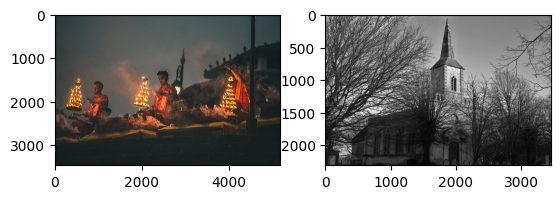

In [ ]:
import cv2
from skimage import io
from matplotlib import pyplot as plt

image_path='/content/aditya-prakash-rJcakYQpxkw-unsplash.jpg'
image_path1="/content/lidia-nikole-2USdwI7UKZ8-unsplash.jpg"
image=cv2.imread(image_path)
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
#OpenCV uses the BGR (Blue, Green, Red)
#color channel ordering by default
image2=io.imread(image_path1)

fig=plt.figure()
ax1=fig.add_subplot(1,2,1)
ax1.imshow(image)
ax2=fig.add_subplot(1,2,2)
ax2.imshow(image2)



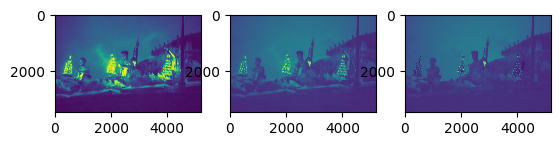

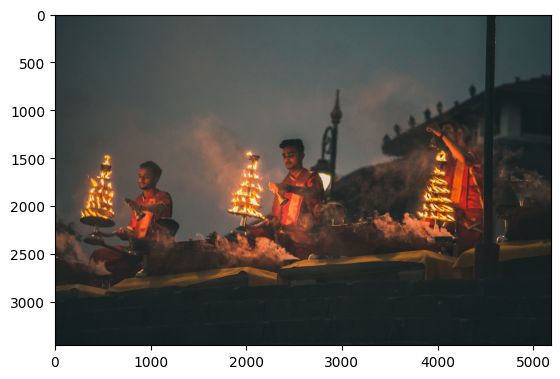

In [ ]:
#color channels
b=image2[:,:,0]
g=image2[:,:,1]
r=image2[:,:,2]

fig=plt.figure()
ax1=fig.add_subplot(1,3,1)
ax1.imshow(b)
ax1=fig.add_subplot(1,3,2)
ax1.imshow(g)
ax1=fig.add_subplot(1,3,3)
ax1.imshow(r)

fig=plt.figure()
ax1=fig.add_subplot(1,1,1)
ax1.imshow(image)

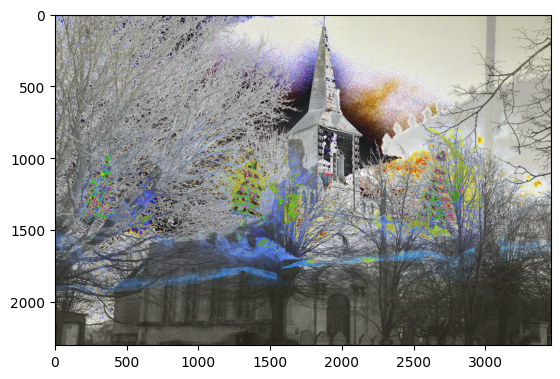

In [ ]:
import numpy as np
import cv2

def add_image(img_path1,img_path2):
  img1=cv2.imread(img_path1)
  img2=cv2.imread(img_path2)

  (h1, w1, d3)=img1.shape
  (h2, w2, d1)=img2.shape

  minW=min(w1,w2)
  minH=min(h1,h2)

  img1=cv2.resize(img1,(minW,minH))
  img2=cv2.resize(img2,(minW,minH))

  op_img=np.zeros((minH,minW,3),dtype=np.uint8)

  for x in range(minW):
    for y in range(minH):
      px1=img1[y,x]
      px2=img2[y,x]

      newPx=np.clip(px1+px2,0,255).astype(np.uint8)

      op_img[y,x]=newPx

  fig=plt.figure(  )
  ax1=fig.add_subplot(1,1,1)
  ax1.imshow(op_img)

add_image("/content/aditya-prakash-rJcakYQpxkw-unsplash.jpg","/content/lidia-nikole-2USdwI7UKZ8-unsplash.jpg")



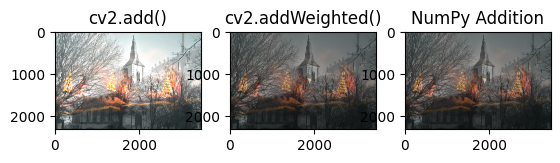

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load two images
img1 = cv2.imread("/content/lidia-nikole-2USdwI7UKZ8-unsplash.jpg")
img2 = cv2.imread("/content/aditya-prakash-rJcakYQpxkw-unsplash.jpg")

# Ensure both images have the same dimensions
(h1, w1, d3)=img1.shape
(h2, w2, d1)=img2.shape

minW=min(w1,w2)
minH=min(h1,h2)

img1=cv2.resize(img1,(minW,minH))
img2=cv2.resize(img2,(minW,minH))

# Define weights and gamma factor
alpha = 0.5  # Weight of the first image
beta = 0.5   # Weight of the second image
gamma = 0    # Gamma factor (added to the result)

# OpenCV add
cv2_add_result = cv2.add(img1, img2)

# OpenCV addWeighted
cv2_addweighted_result = cv2.addWeighted(img1, alpha, img2, beta, gamma)

# NumPy addition
numpy_add_result = np.clip(img1 * alpha + img2 * beta + gamma, 0, 255).astype(np.uint8)

# Display the results
plt.subplot(131), plt.imshow(cv2.cvtColor(cv2_add_result, cv2.COLOR_BGR2RGB)), plt.title('cv2.add()')
plt.subplot(132), plt.imshow(cv2.cvtColor(cv2_addweighted_result, cv2.COLOR_BGR2RGB)), plt.title('cv2.addWeighted()')
plt.subplot(133), plt.imshow(cv2.cvtColor(numpy_add_result, cv2.COLOR_BGR2RGB)), plt.title('NumPy Addition')
plt.show()
